United States Green Banks Analysis

In [1]:
#!/usr/bin/env python
# coding: utf-8

# # Green Banks Data Viz

# In this Jupyter file, there is analysis of financial growth and further projections for US Green Banks, that have published extensive and reliable financial data. For the purposes of data hygiene, the banks with unreliable or not full accounts or banks that have provided data for less than 5 consecutive financial years have been excluded from the dataset.

# In[24]:


import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import iqr
import matplotlib.pyplot as plt
import random
banks = pd.read_csv('Green_Banks_profits_fixed.csv', delimiter = ';', decimal = ',')
columns_to_drop = ['Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', '"Large Banks"', '"Intermediate Banks"', '"Small Banks"']
banks = banks.drop(columns=columns_to_drop, errors='ignore')
display(banks.head())
#Before we start analyzing, let's review and clean the dataset
display(banks.columns)


# In[25]:


#First, we shall rename the col.names so they are easier to work with
banks = banks.rename(columns = {
    "Bank name": "Name",
    "Year": "Year",
    "State/Territory": "State",
    "Total assets and deferred outflow of resources(under management)": "Assets",
    "Net position(invested)": "Net",
    "Total Liabilities": "Liabilities",
    "Operating Revenue(Loss)": "O_Revenue",
    "Operating expenses": "O_Expenses",
    "Non-operating revenue": "NRevenue",
    "Overall profit(Loss) ": "Profit",
    "Total assets, including net deferred inflows/outflows": "TAssets"
})
display(banks.head())
#Now the names of the columns are much prettier

,Bank name,Year,State/Territory,Total assets and deferred outflow of resources(under management),Net position(invested),Total Liabilities,Operating Revenue(Loss),Operating expenses,Non-operating revenue,Overall profit(Loss),"Total assets, including net deferred inflows/outflows",Debt-to-Equity ratio,Debt Ratio,Equity Ratio,ROA,ROE,Net Profit Margin,Asset Turnover Ratio,Efficiency Ratio,Current Ratio
0,California Infrastructure and Economic Develop...,2022,CA,1013340602,627927474,385413128,135569796,10434945.0,-16350215.0,108784636.0,1013340602,0.61,0.38,0.62,0.11,0.17,0.912473,0.13,"0,08","2,629232188"
1,California Infrastructure and Economic Develop...,2021,CA,916581068,519142838,397438230,105072456,18907579.0,1464039.0,87628916.0,916581068,0.77,0.43,0.57,0.10,0.17,0.822525,0.11,"0,18","2,3062227"
2,California Infrastructure and Economic Develop...,2020,CA,856535567,431513922,425021645,66473038,12361360.0,6762026.0,60873704.0,856535567,0.98,0.50,0.50,0.07,0.14,0.831210,0.08,"0,19","2,015275168"
3,California Infrastructure and Economic Develop...,2019,CA,824958651,370640218,454318433,15099260,26473315.0,9726800.0,-1647255.0,824958651,1.23,0.55,0.45,0.00,0.00,-0.066352,0.02,"1,75","1,815815937"
4,California Infrastructure and Economic Develop...,2018,CA,817061786,372287473,444774313,13429110,21768881.0,4229945.0,-4109826.0,817061786,1.19,0.54,0.46,-0.01,-0.01,-0.232732,0.02,"1,62","1,83702557"


Index(['Bank name', 'Year', 'State/Territory',
       'Total assets and deferred outflow of resources(under management)',
       'Net position(invested)', 'Total Liabilities',
       'Operating Revenue(Loss)', 'Operating expenses',
       'Non-operating revenue', 'Overall profit(Loss) ',
       'Total assets, including net deferred inflows/outflows',
       'Debt-to-Equity ratio', 'Debt Ratio', 'Equity Ratio', 'ROA', 'ROE',
       'Net Profit Margin', 'Asset Turnover Ratio', 'Efficiency Ratio',
       'Current Ratio'],
      dtype='object')

,Name,Year,State,Assets,Net,Liabilities,O_Revenue,O_Expenses,NRevenue,Profit,TAssets,Debt-to-Equity ratio,Debt Ratio,Equity Ratio,ROA,ROE,Net Profit Margin,Asset Turnover Ratio,Efficiency Ratio,Current Ratio
0,California Infrastructure and Economic Develop...,2022,CA,1013340602,627927474,385413128,135569796,10434945.0,-16350215.0,108784636.0,1013340602,0.61,0.38,0.62,0.11,0.17,0.912473,0.13,"0,08","2,629232188"
1,California Infrastructure and Economic Develop...,2021,CA,916581068,519142838,397438230,105072456,18907579.0,1464039.0,87628916.0,916581068,0.77,0.43,0.57,0.10,0.17,0.822525,0.11,"0,18","2,3062227"
2,California Infrastructure and Economic Develop...,2020,CA,856535567,431513922,425021645,66473038,12361360.0,6762026.0,60873704.0,856535567,0.98,0.50,0.50,0.07,0.14,0.831210,0.08,"0,19","2,015275168"
3,California Infrastructure and Economic Develop...,2019,CA,824958651,370640218,454318433,15099260,26473315.0,9726800.0,-1647255.0,824958651,1.23,0.55,0.45,0.00,0.00,-0.066352,0.02,"1,75","1,815815937"
4,California Infrastructure and Economic Develop...,2018,CA,817061786,372287473,444774313,13429110,21768881.0,4229945.0,-4109826.0,817061786,1.19,0.54,0.46,-0.01,-0.01,-0.232732,0.02,"1,62","1,83702557"


129 is the new lenght of the dataset


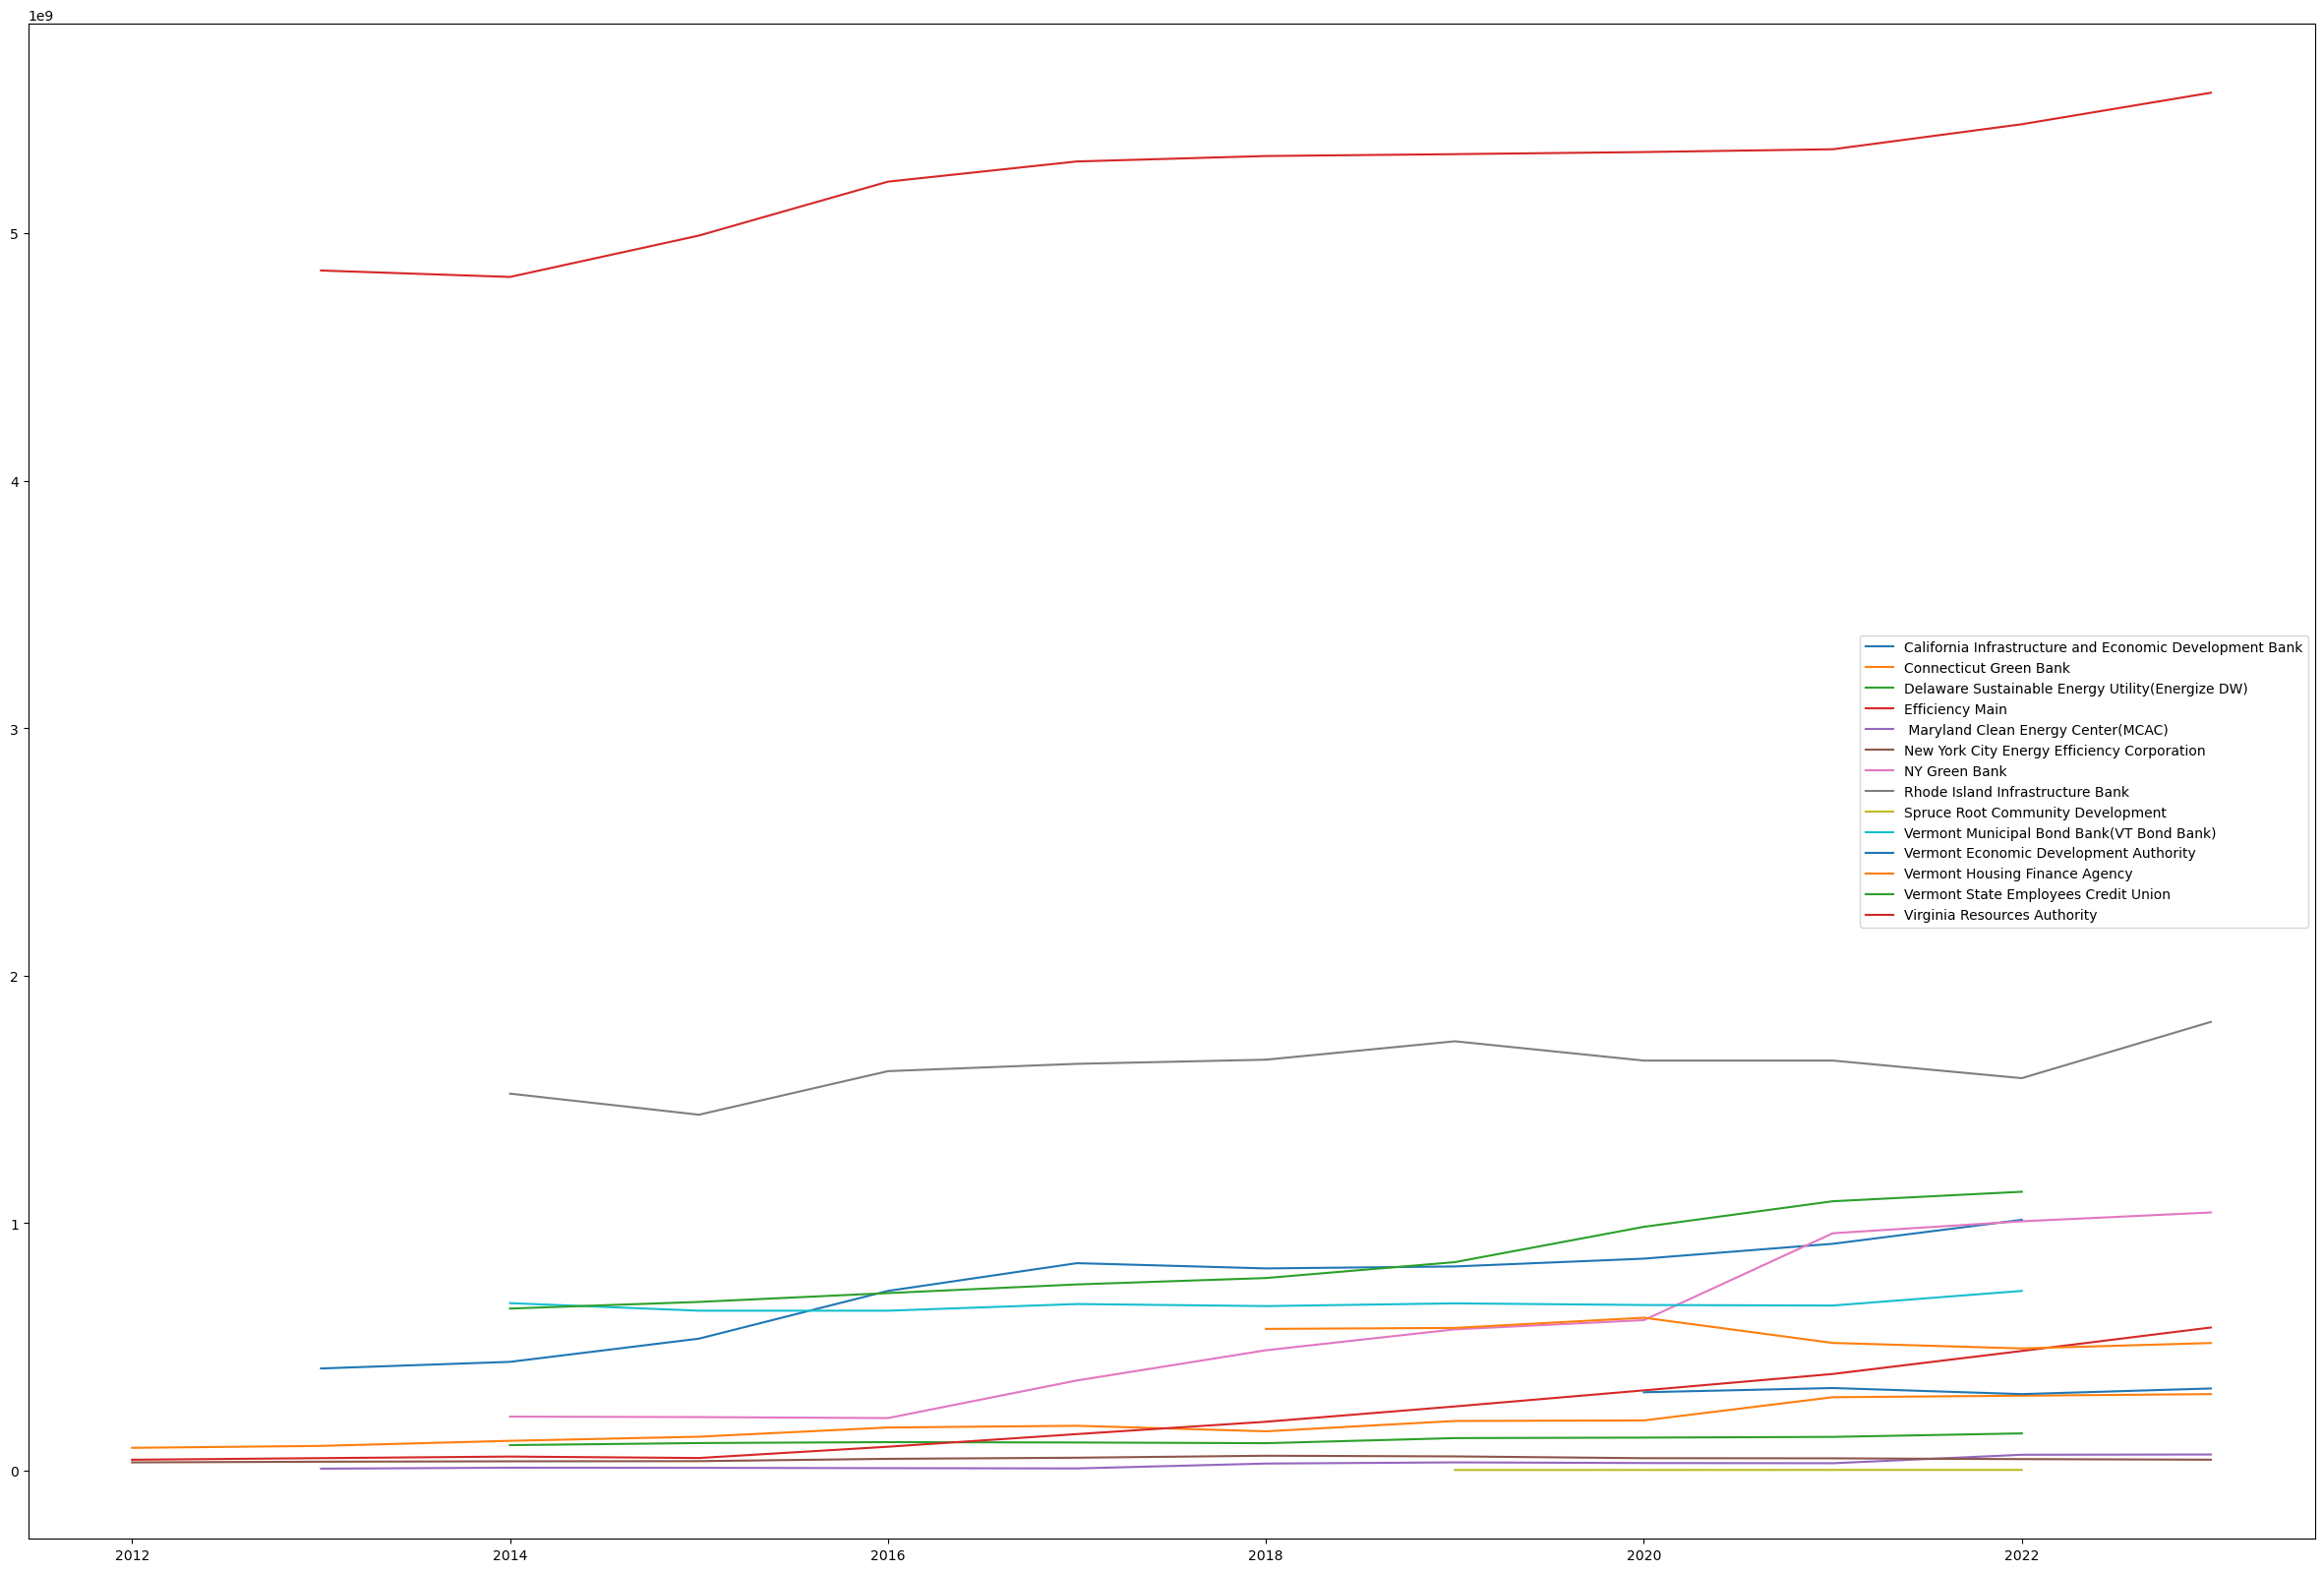

In [2]:

# In[26]:


banks = banks.dropna(subset = 'Year')
print(str(len(banks)) + ' is the new lenght of the dataset')
#We have replaced all the blank spaces, let's look at the entries in the "State" column now
#Time to make the year into an int variable
banks['Year'] = banks['Year'].astype('int64')
#display(banks.head())
plt.figure(figsize=(30, 20))

# Get unique bank names
unique_banks = banks['Name'].unique()

# Loop through each unique bank and plot its data with a different color
for bank in unique_banks:
    bank_data = banks[banks['Name'] == bank]
    plt.plot(bank_data['Year'], bank_data['TAssets'], label=bank)

# Add legend
plt.legend()

# Show plot
plt.show()



['Intermediate' 'Small' 'Large']
{2023: [309288113, 578301915, 65282733, 44251736, 332003000, 515556000], 2022: [302740480, 150525149, 483546208, 64171298, 46600021, 2907976, 309218000, 493781000], 2021: [296685796, 136391909, 390579241, 29971981, 49730328, 2932216, 333738000, 515925000], 2020: [202900357, 133440806, 324328757, 30775866, 50296570, 2730142, 316728000, 617873000], 2019: [200689040, 131489955, 259425980, 33416306, 57585849, 2786625, 576625000], 2018: [158939842, 110913385, 197542148, 28649609, 60248349, 572712000], 2017: [181275212, 113703542, 147691862, 8944394, 52237598], 2016: [174254166, 115171385, 96624152, 10057939, 47767892], 2015: [137096184, 111480079, 51069304, 11354936, 38341812], 2014: [120488476, 103123752, 56894548, 11940944, 37718485], 2013: [99990000, 50565827, 8015993, 36188332], 2012: [92175000, 44082299, 33333547]}
----
{2022: [1013340602, 1007388000, 1585773691, 726208838, 1126837000], 2021: [916581068, 959159000, 1656822855, 667130333, 1088463000], 20

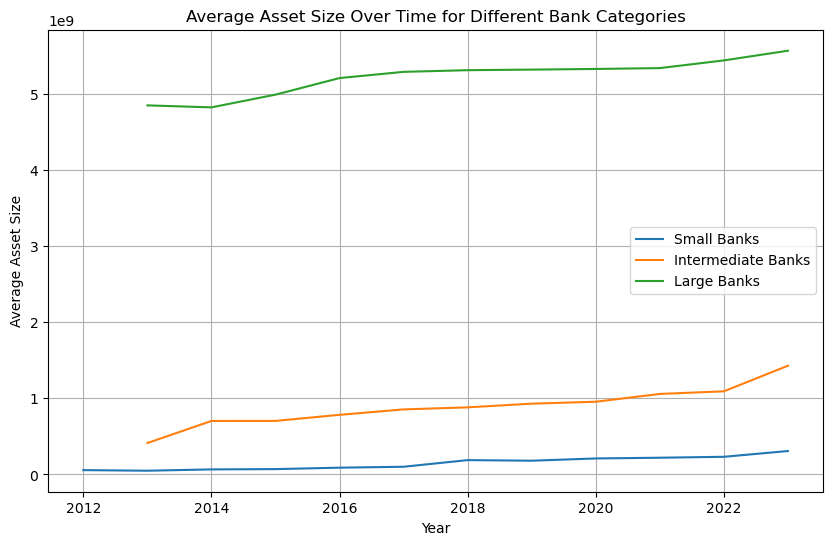

In [3]:

# Very cool! Now that we have made our first plot, let's classify banks into groups by asset under management size to see how different groups of banks perform over time. If a bank's size is below US$ 600., it is small. if it is larger than US$ 2b., it is a large bank. Anything in between is an intermediate bank. Due to sizing changes over time, we took the avg for each bank and classified it accordingly.

# In[27]:


banks['Size'] = '0'
large_banks  = ["Virginia Resources Authority"]
intermediate_banks = ["California Infrastructure and Economic Development Bank",
                        "NY Green Bank", "Rhode Island Infrastructure Bank",
                        "Vermont Municipal Bond Bank(VT Bond Bank)",
                        "Vermont State Employees Credit Union"]
small_banks = ["Connecticut Green Bank", "DC Green Bank",
                 "Delaware Sustainable Energy Utility(Energize DW)", 
                 "Efficiency Main ", " Maryland Clean Energy Center(MCAC) ",
                 "Nevada Clean Energy Fund", "Spruce Root Community Development",
                 "Vermont Economic Development Authority", 'New York City Energy Efficiency Corporation', "Vermont Housing Finance Agency"]
for bank_name in banks.Name:
    if bank_name in large_banks:
        banks.loc[banks['Name'] == bank_name, 'Size'] = 'Large'
    elif bank_name in intermediate_banks:
        banks.loc[banks['Name'] == bank_name, 'Size'] = 'Intermediate'
    elif bank_name in small_banks:
        banks.loc[banks['Name'] == bank_name, 'Size'] = 'Small'
#Let's ensure that there are no banks left "out"
print(banks.Size.unique())


# Time to measure how they perform by "classifying" them into three groups by their average asset size each year, making an "aggregate bank" for each category. For each year, we will measure the average size of the bank, unadjusted for weight(size).

# In[28]:


sbs_yearly = {}
ibs_yearly = {}
lbs_yearly = {}
for index, row in banks.iterrows():
    if row.Size == "Small":
        if row.Year not in sbs_yearly:
            sbs_yearly[row.Year] = []
        sbs_yearly[row.Year].append(row.TAssets)
    elif row.Size == "Intermediate":
        if row.Year not in ibs_yearly:
            ibs_yearly[row.Year] = []
        ibs_yearly[row.Year].append(row.TAssets)
    elif row.Size == "Large":
        if row.Year not in lbs_yearly:
            lbs_yearly[row.Year] = []
        lbs_yearly[row.Year].append(row.TAssets)
print(sbs_yearly)
print('----')
print(ibs_yearly)
print('----')
#For each dictionary and year, let's calculate the average TAsset size with a function
def calc_average_assets(yearly_data):
    average_assets = {}
    for year, assets_list in yearly_data.items():
        if assets_list:
            average_assets[year] = sum(assets_list) / len(assets_list)
        else:
            average_assets[year] = 0  # If no data for the year, set average to 0
    return average_assets
average_sbs_assets = calc_average_assets(sbs_yearly)
average_ibs_assets = calc_average_assets(ibs_yearly)
average_lbs_assets = calc_average_assets(lbs_yearly)
print(average_ibs_assets)
#Final step: plot the average assets for each size for each year
def plot_average_assets(average_assets, category_name):
    years = list(average_assets.keys())
    assets = list(average_assets.values())
    plt.plot(years, assets, label=category_name)

plt.figure(figsize=(10, 6))

# Get a sorted list of years
years_sorted = sorted(set(average_sbs_assets.keys()) | set(average_ibs_assets.keys()) | set(average_lbs_assets.keys()))
#Clump them into one and then sort then, returning them back into the original dictionaries
for category, assets_dict in [("Small Banks", average_sbs_assets), ("Intermediate Banks", average_ibs_assets), ("Large Banks", average_lbs_assets)]:
    years = sorted(set(assets_dict.keys()).intersection(set(years_sorted)))
    assets = [assets_dict[year] for year in years]
    plt.plot(years, assets, label=category)

plt.xlabel('Year')
plt.ylabel('Average Asset Size')
plt.title('Average Asset Size Over Time for Different Bank Categories')
plt.legend()
plt.grid(True)
plt.show()


# Now we will "normalize" the asset size to be able to compare growth more reliably. 



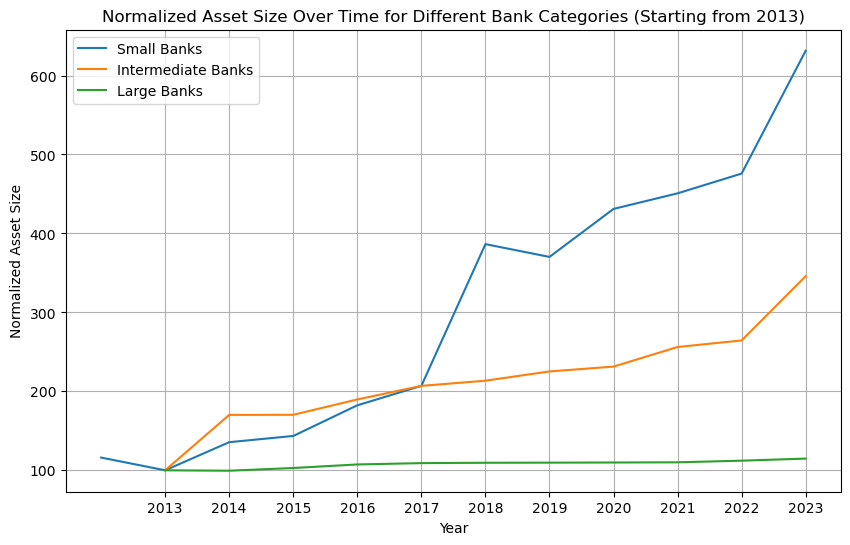

In [4]:

start_year = 2013

plt.figure(figsize=(10, 6))

# Find the asset size at the start year (2013)
start_values = {
    category: assets_dict.get(start_year, 1)  # Use 1 as default if start year is missing
    for category, assets_dict in [("Small Banks", average_sbs_assets), ("Intermediate Banks", average_ibs_assets), ("Large Banks", average_lbs_assets)]
}

for category, assets_dict in [("Small Banks", average_sbs_assets), ("Intermediate Banks", average_ibs_assets), ("Large Banks", average_lbs_assets)]:
    years = sorted(set(assets_dict.keys()).intersection(set(years_sorted)))
    assets = [assets_dict[year] for year in years]
    # Normalize the data to start at 100 from the start year
    normalized_assets = [asset / start_values[category] * 100 for asset in assets]
    plt.plot(years, normalized_assets, label=category)

plt.xlabel('Year')
plt.ylabel('Normalized Asset Size')
plt.title('Normalized Asset Size Over Time for Different Bank Categories (Starting from 2013)')
plt.legend()
plt.grid(True)
plt.xticks(range(2013, max(years)+1))
plt.show()



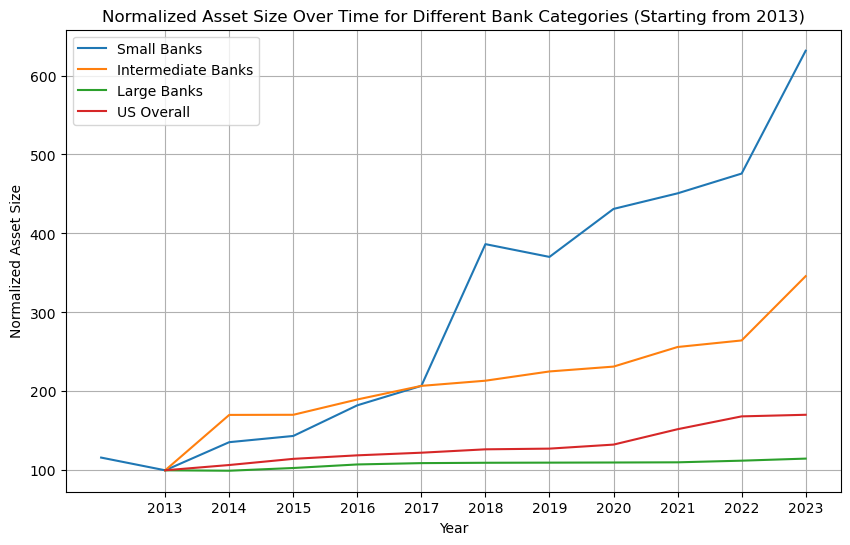

In [5]:


#Last step: see how that compares to the overall US commercial bank performance:
us_commercial_banks_growth = {
    2023: 1.10,
    2022: 1.20,
    2021: 10.70,
    2020: 14.70,
    2019: 4.00,
    2018: 0.70,
    2017: 3.50,
    2016: 2.80,
    2015: 3.90,
    2014: 7.30,
    2013: 6.70,
    2012: 2.80
}
start_values = {
    category: assets_dict.get(start_year, 1)  # Use 1 as default if start year is missing
    for category, assets_dict in [("Small Banks", average_sbs_assets), ("Intermediate Banks", average_ibs_assets), ("Large Banks", average_lbs_assets)]
}
us_overall_assets = [100]
for year in range(2014, 2024):
    us_overall_assets.append(us_overall_assets[-1] * (1 + us_commercial_banks_growth.get(year - 1, 0) / 100))
plt.figure(figsize=(10, 6))
for category, assets_dict in [("Small Banks", average_sbs_assets), ("Intermediate Banks", average_ibs_assets), ("Large Banks", average_lbs_assets)]:
    years = sorted(set(assets_dict.keys()).intersection(set(years_sorted)))
    assets = [assets_dict[year] for year in years]
    normalized_assets = [asset / start_values[category] * 100 for asset in assets]
    plt.plot(years, normalized_assets, label=category)
plt.plot(range(2013, 2024), us_overall_assets, label="US Overall")
plt.xlabel('Year')
plt.ylabel('Normalized Asset Size')
plt.title('Normalized Asset Size Over Time for Different Bank Categories (Starting from 2013)')
plt.legend()
plt.grid(True)
plt.xticks(range(2013, max(years)+1))
plt.show()





{2022: 518934476.8, 2021: 472865099.4, 2020: 383537375.6, 2019: 361528586.8, 2018: 323947193.2, 2017: 303902872.4, 2016: 235867334.2, 2015: 226440429.0, 2014: 222121408.4, 2013: 278518624.0, 2023: 993846921.0}


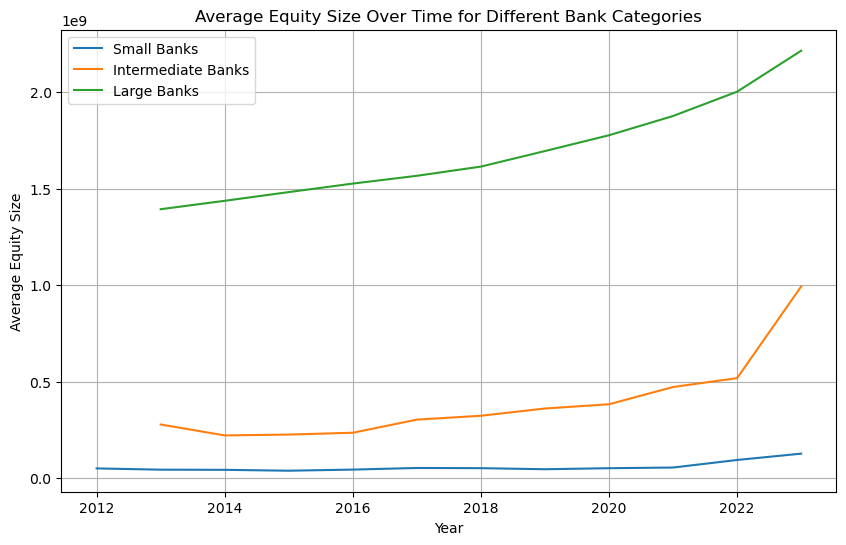

<Figure size 640x480 with 0 Axes>

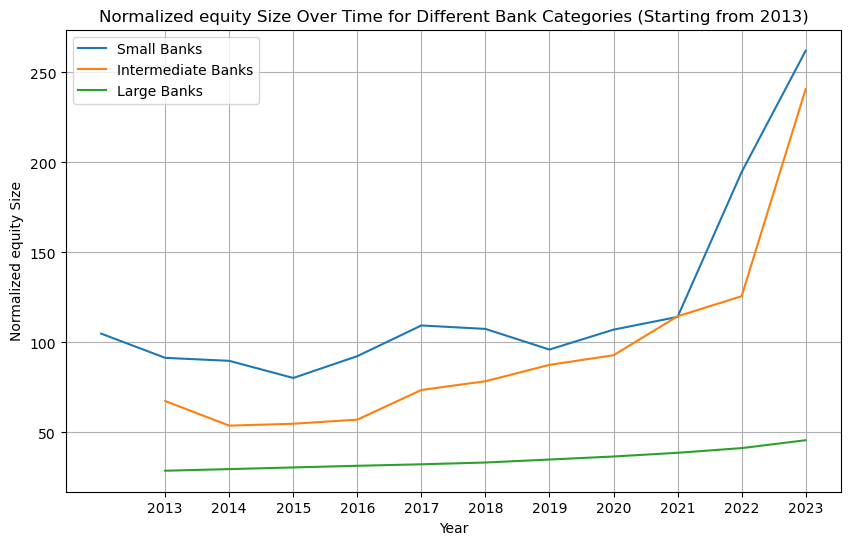

In [6]:
# Now, we will graph equity using the same formula

# In[31]:


sbs_yearly_eq = {}
ibs_yearly_eq = {}
lbs_yearly_eq = {}
for index, row in banks.iterrows():
    if row.Size == "Small":
        if row.Year not in sbs_yearly_eq:
            sbs_yearly_eq[row.Year] = []
        sbs_yearly_eq[row.Year].append(row['Net'])
    elif row.Size == "Intermediate":
        if row.Year not in ibs_yearly_eq:
            ibs_yearly_eq[row.Year] = []
        ibs_yearly_eq[row.Year].append(row['Net'])
    elif row.Size == "Large":
        if row.Year not in lbs_yearly_eq:
            lbs_yearly_eq[row.Year] = []
        lbs_yearly_eq[row.Year].append(row['Net'])
def calc_average_equity(yearly_data):
    average_equity = {}
    for year, equity_list in yearly_data.items():
        if equity_list:
            average_equity[year] = sum(equity_list) / len(equity_list)
        else:
            average_equity[year] = 0 
    return average_equity
average_sbs_equity = calc_average_equity(sbs_yearly_eq)
average_ibs_equity = calc_average_equity(ibs_yearly_eq)
average_lbs_equity = calc_average_equity(lbs_yearly_eq)
print(average_ibs_equity)
def plot_average_equity(average_equity, category_name):
    years = list(average_equity.keys())
    equity = list(average_equity.values())
    plt.plot(years, equity, label=category_name)

plt.figure(figsize=(10, 6))

# Get a sorted list of years
years_sorted = sorted(set(average_sbs_equity.keys()) | set(average_ibs_equity.keys()) | set(average_lbs_equity.keys()))
#Clump them into one and then sort then, returning them back into the original dictionaries
for category, equity_dict in [("Small Banks", average_sbs_equity), ("Intermediate Banks", average_ibs_equity), ("Large Banks", average_lbs_equity)]:
    years = sorted(set(equity_dict.keys()).intersection(set(years_sorted)))
    equity = [equity_dict[year] for year in years]
    plt.plot(years, equity, label=category)

plt.xlabel('Year')
plt.ylabel('Average Equity Size')
plt.title('Average Equity Size Over Time for Different Bank Categories')
plt.legend()
plt.grid(True)
plt.show()
plt.clf()
#000000
start_year = 2013

plt.figure(figsize=(10, 6))

# Fit the asset size at the start year (2013/input)
for category, equity_dict in [("Small Banks", average_sbs_equity), ("Intermediate Banks", average_ibs_equity), ("Large Banks", average_lbs_equity)]:
    years = sorted(set(equity_dict.keys()).intersection(set(years_sorted)))
    equity = [equity_dict[year] for year in years]
    # Normalize the data to start at 100 from the start year
    normalized_equity = [eq / start_values[category] * 100 for eq in equity]
    plt.plot(years, normalized_equity, label=category)

plt.xlabel('Year')
plt.ylabel('Normalized equity Size')
plt.title('Normalized equity Size Over Time for Different Bank Categories (Starting from 2013)')
plt.legend()
plt.grid(True)
plt.xticks(range(2013, max(years)+1))
plt.show()



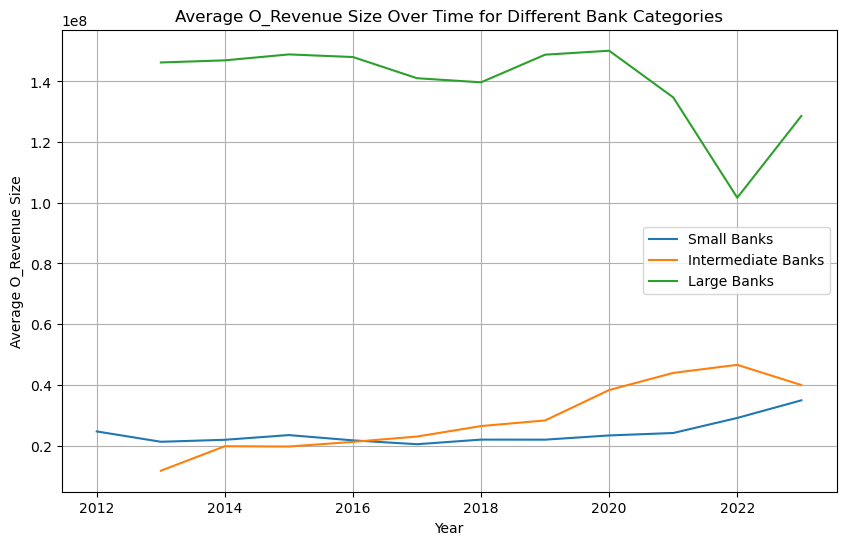

<Figure size 640x480 with 0 Axes>

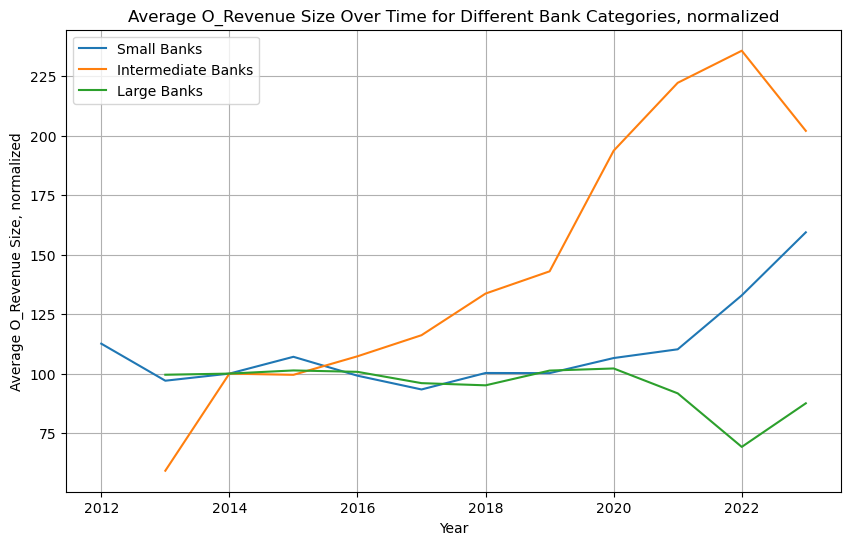

In [7]:

# Again, let's add the function to be able to plot these two graphs for any column in our original dataset


def banks_plotter(col, start_year = 2013):
    small_name = col + '_yearly_small'
    small_name = {}
    intermediate_name = col + '_yearly_intermediate'
    intermediate_name = {}
    large_name = col + '_yearly_large'
    large_name = {}
    for index, row in banks.iterrows():
        if row['Size'] == 'Small':
            if row['Year'] not in small_name:
                small_name[row['Year']] = []
            small_name[row['Year']].append(row[col])
        if row['Size'] == 'Intermediate':
            if row['Year'] not in intermediate_name:
                intermediate_name[row['Year']] = []
            intermediate_name[row['Year']].append(row[col])
        if row['Size'] == 'Large':
            if row['Year'] not in large_name:
                large_name[row['Year']] = []
            large_name[row['Year']].append(row[col])
    #Now, we have three dictionaries with pure data in them, time to modify and alter them so as to actually be able to plot the data. off we go
    #Let's first put it so it creates an average function for each
    avg_func_name = "calc_average_" + col
    #We can just use the old function as all the values are only for internal purposes => doesn't use any "equity" tied to the column names, just for convenience
    def avg_func_name(yearly_data):
        average_equity = {}
        for year, equity_list in yearly_data.items():
            if equity_list:
                average_equity[year] = sum(equity_list) / len(equity_list)
            else:
                average_equity[year] = 0 
        return average_equity
    avg_stat_small = "average_sbs_" + col
    avg_stat_intermediate = "average_ibs_" + col
    avg_stat_large = "average_lbs_" + col
    avg_stat_small = avg_func_name(small_name)
    avg_stat_intermediate = avg_func_name(intermediate_name)
    avg_stat_large = avg_func_name(large_name)
    def plot_average_equity(average_col, category_name):
        years = list(average_col.keys())
        assets = list(average_col.values())
        plt.plot(years, assets, label=category_name)

    plt.figure(figsize=(10, 6))

    # Get a sorted list of years
    years_sorted = sorted(set(avg_stat_small.keys()) | set(avg_stat_intermediate.keys()) | set(avg_stat_large.keys()))
    #Clump them into one and then sort then, returning them back into the original dictionaries
    for category, col_dict in [("Small Banks", avg_stat_small), ("Intermediate Banks", avg_stat_intermediate), ("Large Banks", avg_stat_large)]:
        years = sorted(set(col_dict.keys()).intersection(set(years_sorted)))
        data = [col_dict[year] for year in years]
        plt.plot(years, data, label=category)

    plt.xlabel('Year')
    plt.ylabel('Average ' + col + ' Size')
    plt.title('Average ' + col + ' Size Over Time for Different Bank Categories')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.clf()
    #Time to make a normalized plot
    plt.figure(figsize = (10, 6))
    for category, col_dict in [("Small Banks", avg_stat_small), ("Intermediate Banks", avg_stat_intermediate), ("Large Banks", avg_stat_large)]:
        years = sorted(set(col_dict.keys()).intersection(set(years_sorted)))
        stat = [col_dict[year] for year in years]
        # Normalize the data to start at 100 from the start year
        start_year_col = col_dict.get(start_year, 1)  # Use 1 as default if start year is missing
        normalized_col = [s / start_year_col * 100 for s in stat]  # Corrected variable name
        plt.plot(years, normalized_col, label=category)
        
    plt.xlabel('Year')
    plt.ylabel('Average ' + col + ' Size, normalized')
    plt.title('Average ' + col + ' Size Over Time for Different Bank Categories, normalized')
    plt.legend()
    plt.grid(True)
    plt.show()
        
banks_plotter('O_Revenue', start_year = 2014)



Column 'Current Ratio' contains non-numeric values.


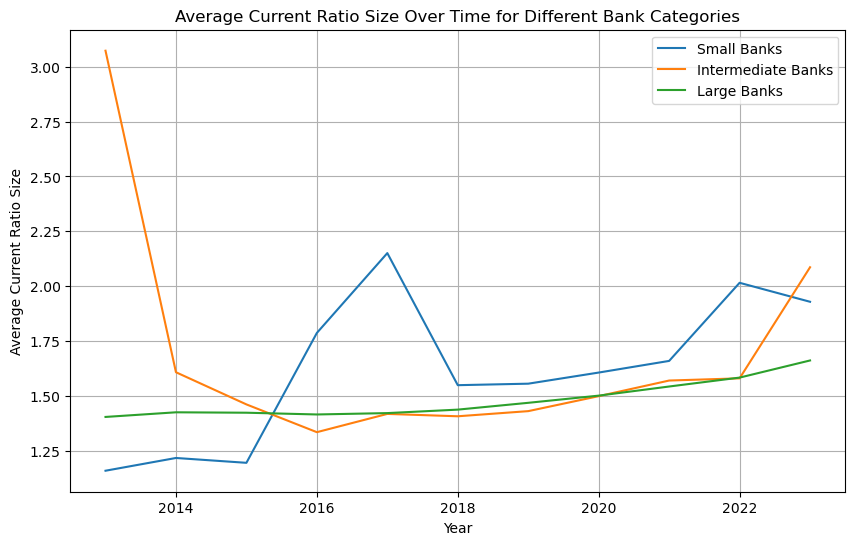

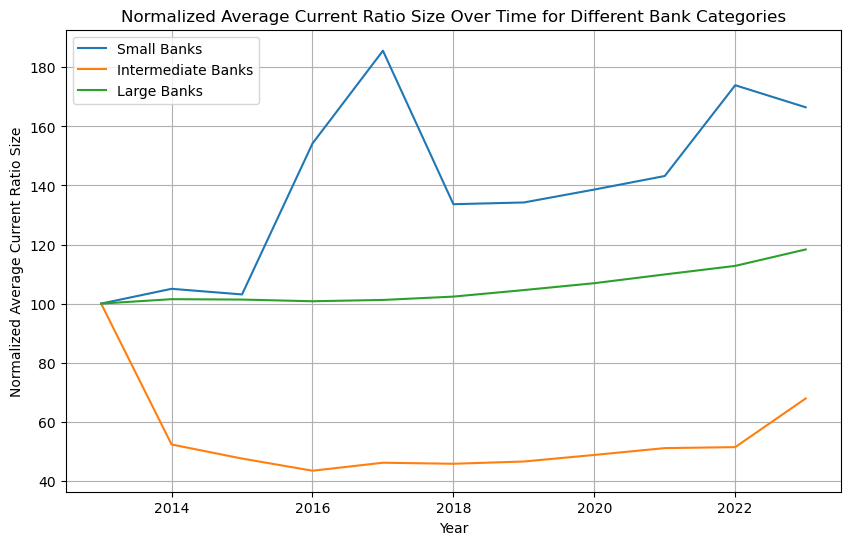

In [8]:

# Now we have the tools to compare essentially anything we need. The last thing to write is a function to be able to compare ratios. The difference between this function and the other ones is that here, outliers may be very common, completely skewing the whole ideas as ratios, for example, are very sensitive to low values. Therefore, we need to include the filtering of all ratios so as they do not fall too outside the population median.

# In[54]:


#The only modification that needs to be done to the previous function is determining the column median, IQR, Q1, Q3, and finding the outline border. 
#After that, we just need to add another condition into the intial filtering into the dictinaries, where it checks if the variable fits the requirements before including it.

def banks_plotter_ratio(col, start_year=2013):
    # Remove non-numeric values and convert column to float
    banks[col] = banks[col].replace('#DIV/0!', np.nan)
    

    # Check if the first value in the column is an integer
    if ',' in str(banks[col][1]):
        banks[col] = banks[col].str.replace(',', '.').astype(float)
        banks[col] = pd.to_numeric(banks[col], errors='coerce')

    # Check for non-numeric values
    if banks[col].isna().any():
        print(f"Column '{col}' contains non-numeric values.")

    # Drop rows with NA values in the specified column
    banks_cleaned = banks.dropna(subset=[col])

    # Calculate quartiles and IQR
    first_quartile = np.nanpercentile(banks_cleaned[col], 25)
    third_quartile = np.nanpercentile(banks_cleaned[col], 75)
    iqr_ratio = third_quartile - first_quartile
    lower_cutoff = first_quartile - iqr_ratio * 1.5
    upper_cutoff = third_quartile + iqr_ratio * 1.5

    small_name = {}
    intermediate_name = {}
    large_name = {}

    for index, row in banks_cleaned.iterrows():
        if row['Size'] == 'Small' and lower_cutoff <= row[col] <= upper_cutoff:
            if row['Year'] not in small_name:
                small_name[row['Year']] = []
            small_name[row['Year']].append(row[col])
        elif row['Size'] == 'Intermediate' and lower_cutoff <= row[col] <= upper_cutoff:
            if row['Year'] not in intermediate_name:
                intermediate_name[row['Year']] = []
            intermediate_name[row['Year']].append(row[col])
        elif row['Size'] == 'Large' and lower_cutoff <= row[col] <= upper_cutoff:
            if row['Year'] not in large_name:
                large_name[row['Year']] = []
            large_name[row['Year']].append(row[col])

    def calc_average(yearly_data):
        average_equity = {}
        for year, equity_list in yearly_data.items():
            if equity_list:
                average_equity[year] = np.nanmean(equity_list)  # Use np.nanmean to handle NaN values
            else:
                average_equity[year] = 0 
        return average_equity

    avg_stat_small = calc_average(small_name)
    avg_stat_intermediate = calc_average(intermediate_name)
    avg_stat_large = calc_average(large_name)

    # Check if there's valid data for plotting
    if not avg_stat_small or not avg_stat_intermediate or not avg_stat_large:
        print("No valid data available for plotting.")
        return

    plt.figure(figsize=(10, 6))

    years_sorted = sorted(set(avg_stat_small.keys()) | set(avg_stat_intermediate.keys()) | set(avg_stat_large.keys()))

    for category, col_dict in [("Small Banks", avg_stat_small), ("Intermediate Banks", avg_stat_intermediate), ("Large Banks", avg_stat_large)]:
        years = sorted(set(col_dict.keys()).intersection(set(years_sorted)))
        data = [col_dict[year] for year in years]
        plt.plot(years, data, label=category)

    plt.xlabel('Year')
    plt.ylabel('Average ' + col + ' Size')
    plt.title('Average ' + col + ' Size Over Time for Different Bank Categories')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))

    for category, col_dict in [("Small Banks", avg_stat_small), ("Intermediate Banks", avg_stat_intermediate), ("Large Banks", avg_stat_large)]:
        years = sorted(set(col_dict.keys()).intersection(set(years_sorted)))
        stat = [col_dict[year] for year in years]
        start_year_col = col_dict.get(start_year, 1)  
        normalized_col = [s / start_year_col * 100 for s in stat] 
        plt.plot(years, normalized_col, label=category)

    plt.xlabel('Year')
    plt.ylabel('Normalized Average ' + col + ' Size')
    plt.title('Normalized Average ' + col + ' Size Over Time for Different Bank Categories')
    plt.legend()
    plt.grid(True)
    plt.show()
banks_plotter_ratio('Current Ratio')


Column 'Efficiency Ratio' contains non-numeric values.


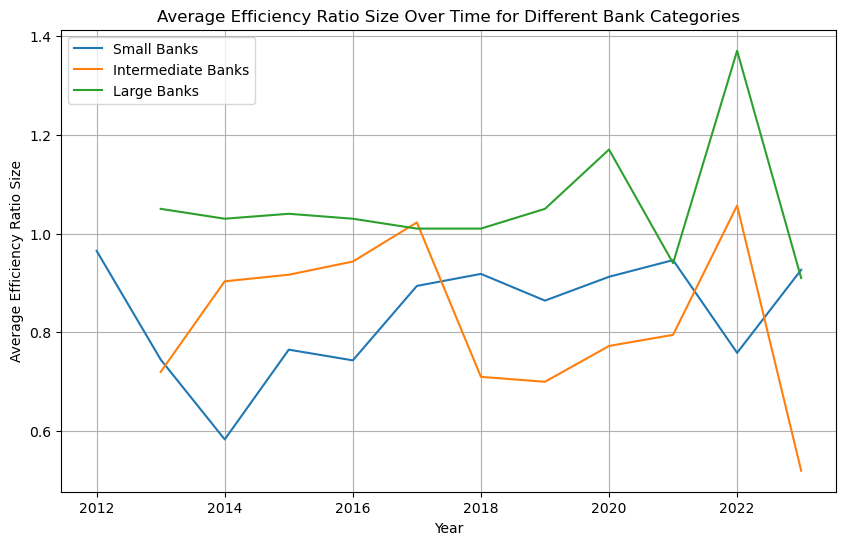

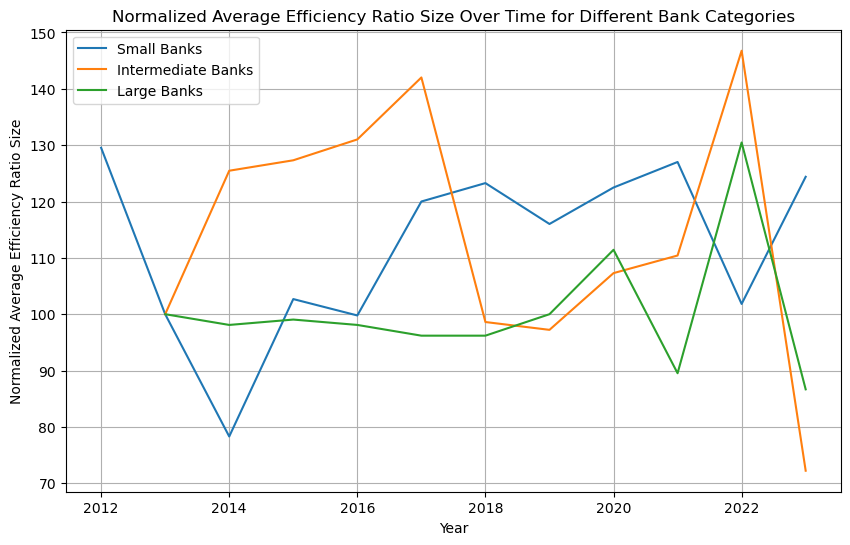

In [9]:
banks_plotter_ratio('Efficiency Ratio')

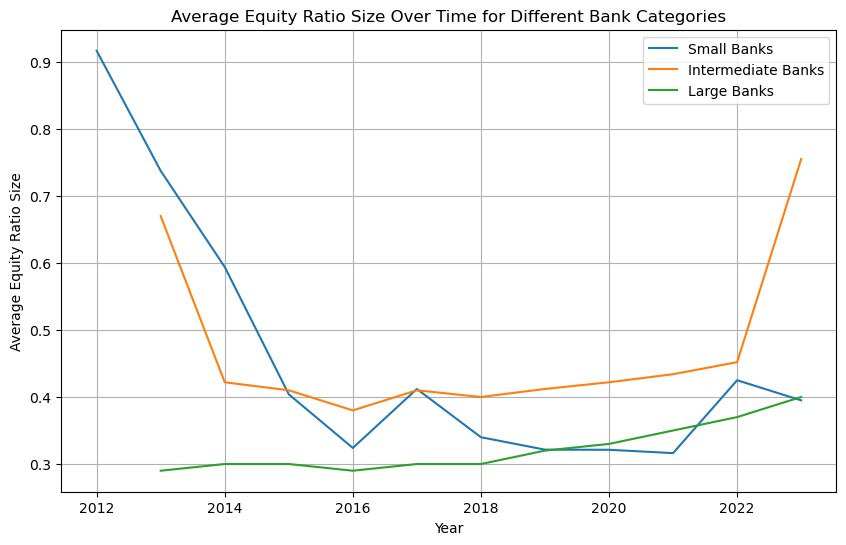

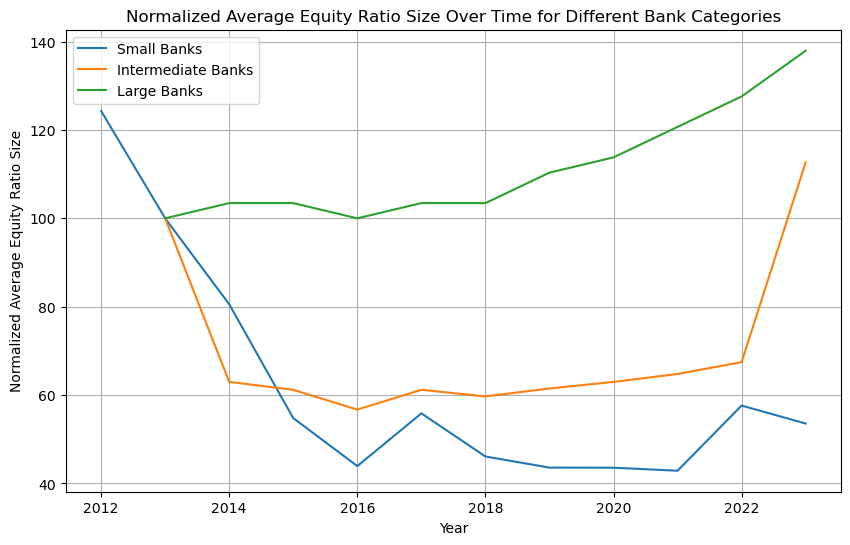

In [10]:
banks_plotter_ratio('Equity Ratio')

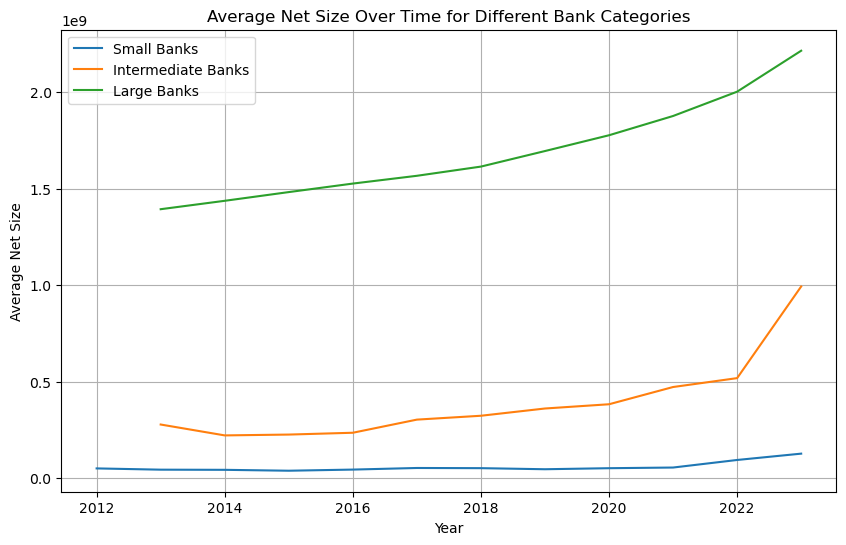

<Figure size 640x480 with 0 Axes>

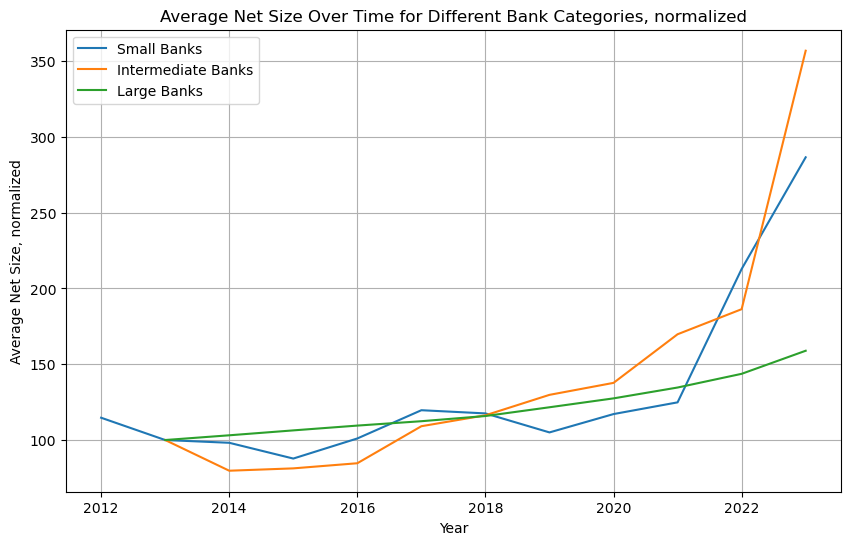

In [11]:
banks_plotter('Net')

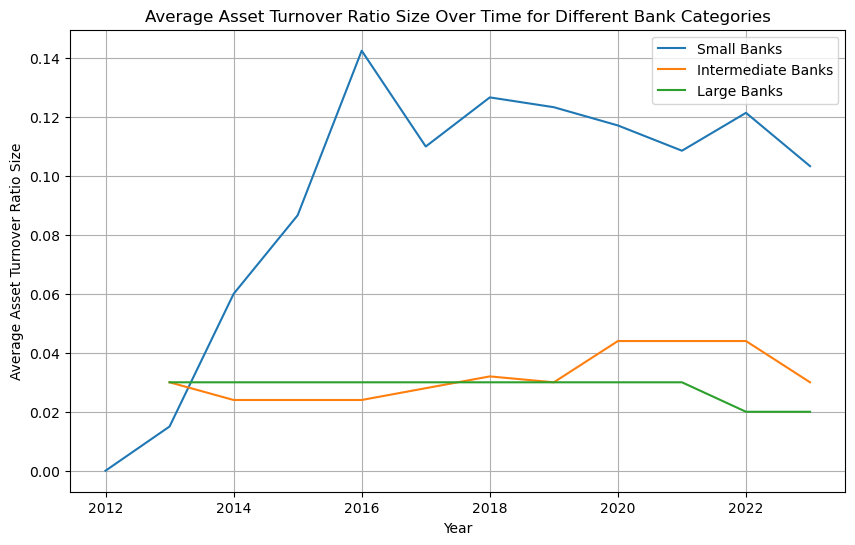

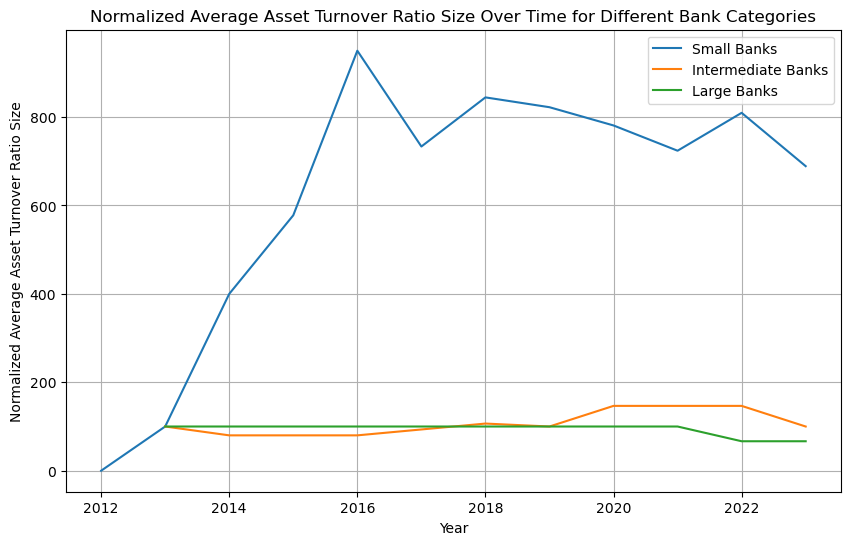

In [34]:
banks_plotter_ratio('Asset Turnover Ratio')

Column 'Current Ratio' contains non-numeric values.


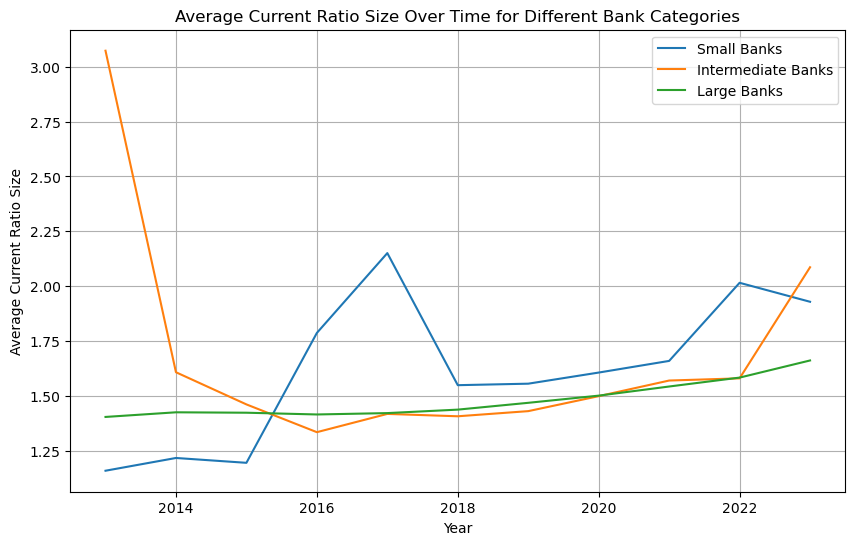

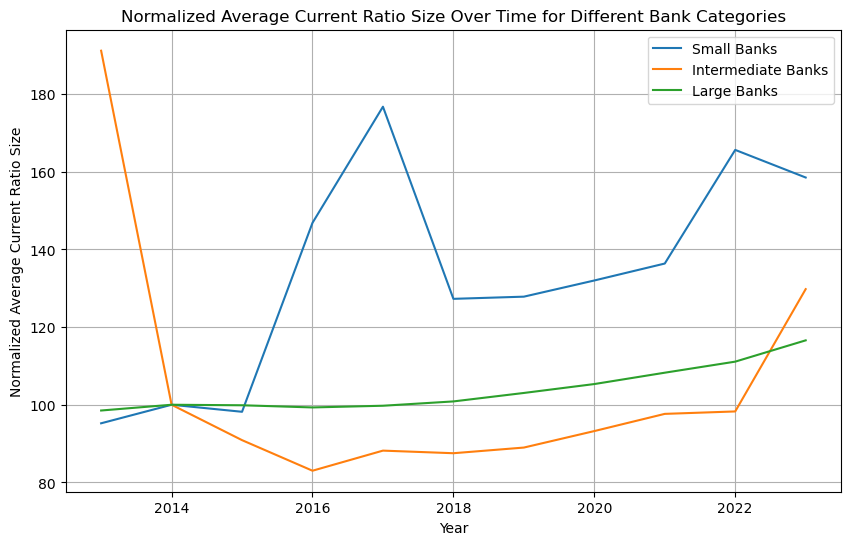

In [12]:
banks_plotter_ratio('Current Ratio', 2014)

For the purposes of benchmarking the performance of the banks compared to the performance of the National US average, our function will have to be modified with a list containing the values for the bank. This can be done by a simple function:

In [14]:
#First, create a supplementary plotter function that goes all the way, except for final vizualization
def banks_plotter_noviz(col, start_year = 2013):
    small_name = col + '_yearly_small'
    small_name = {}
    intermediate_name = col + '_yearly_intermediate'
    intermediate_name = {}
    large_name = col + '_yearly_large'
    large_name = {}
    for index, row in banks.iterrows():
        if row['Size'] == 'Small':
            if row['Year'] not in small_name:
                small_name[row['Year']] = []
            small_name[row['Year']].append(row[col])
        if row['Size'] == 'Intermediate':
            if row['Year'] not in intermediate_name:
                intermediate_name[row['Year']] = []
            intermediate_name[row['Year']].append(row[col])
        if row['Size'] == 'Large':
            if row['Year'] not in large_name:
                large_name[row['Year']] = []
            large_name[row['Year']].append(row[col])
    avg_func_name = "calc_average_" + col
    def avg_func_name(yearly_data):
        average_equity = {}
        for year, equity_list in yearly_data.items():
            if equity_list:
                average_equity[year] = sum(equity_list) / len(equity_list)
            else:
                average_equity[year] = 0 
        return average_equity
    avg_stat_small = "average_sbs_" + col
    avg_stat_intermediate = "average_ibs_" + col
    avg_stat_large = "average_lbs_" + col
    avg_stat_small = avg_func_name(small_name)
    avg_stat_intermediate = avg_func_name(intermediate_name)
    avg_stat_large = avg_func_name(large_name)
    def plot_average_equity(average_col, category_name):
        years = list(average_col.keys())
        assets = list(average_col.values())
        plt.plot(years, assets, label=category_name)
    years_sorted = sorted(set(avg_stat_small.keys()) | set(avg_stat_intermediate.keys()) | set(avg_stat_large.keys()))
    plt.figure(figsize = (10, 6))
    for category, col_dict in [("Small Banks", avg_stat_small), ("Intermediate Banks", avg_stat_intermediate), ("Large Banks", avg_stat_large)]:
        years = sorted(set(col_dict.keys()).intersection(set(years_sorted)))
        stat = [col_dict[year] for year in years]
        # Normalize the data to start at 100 from the start year
        start_year_col = col_dict.get(start_year, 1)  # Use 1 as default if start year is missing
        normalized_col = [s / start_year_col * 100 for s in stat]  # Corrected variable name
        plt.plot(years, normalized_col, label=category)
        

In [15]:
def banks_benchmarked(col, col_type, benchmark, benchmark_name, us_year = 2013, start_year = 2013 ):
    if col_type == 'Normal':
        banks_plotter_noviz(col, start_year)
    elif col_type == 'Ratio': 
        banks_plotter_ratio(col, start_year)
    plt.plot(range(us_year, 2024), benchmark, label = benchmark_name)
    plt.xlabel('Year')
    plt.ylabel('Average ' + col + ' Size, normalized')
    plt.title('Average ' + col + ' Size Over Time for Different Bank Categories, normalized')
    plt.legend()
    plt.grid(True)
    plt.show()
#Moreover, let's add function that will automatically generate a "normalized" list 

def normalizer(list, norm_rank = 1):
    normalized_list = []
    key_metric = 100/list[norm_rank - 1]
    for i in list:
        normalized_list.append(i*key_metric)
    return normalized_list
#Let's these functions by plotting US Banks equity against the ones we have. 
#This is the St. Louis data on the total bank equity capital, sorted to represent the first quarter of each year, from 2012
equity_list = [1568595.402, 1626522.827, 1672464.788, 1764296.089, 1833594.771, 1891362.974, 1963792.803, 2056013.765, 2115322.215, 2250467.943, 2257709.120, 2260065.820]
#This data represents a very large market, if we were to plot it(multiplying it appropriately), we will get a number in the trillions, making the plottiing of it virtually impossible. Let's take a differnet approach, plotting it since 2013.
#First, we need to use the normalizer function so as to adjust the prices. As the year we are starting from, 2013 is the second one, we will put norm_rank as two
equity_list_normalized = normalizer(equity_list, 2)
print(equity_list_normalized)

[96.43857288453536, 100.0, 102.82455064493233, 108.47041675118156, 112.73095837098879, 116.28259638313702, 120.73564357052827, 126.40546636484432, 130.05180006612966, 138.3606738031965, 138.8058674936752, 138.9507594042515]


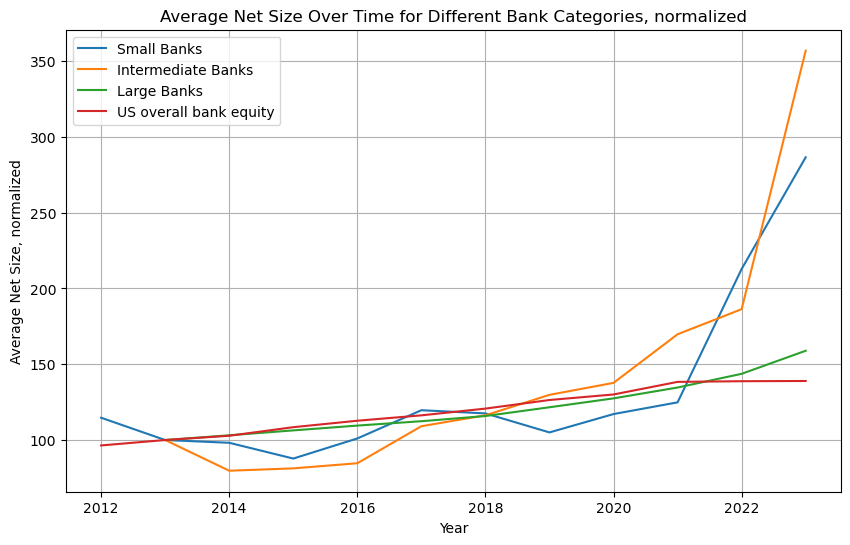

In [16]:
#Then we plot it against Equity(Net)
banks_benchmarked('Net', 'Normal', benchmark = equity_list_normalized, benchmark_name = 'US overall bank equity', us_year = 2012)

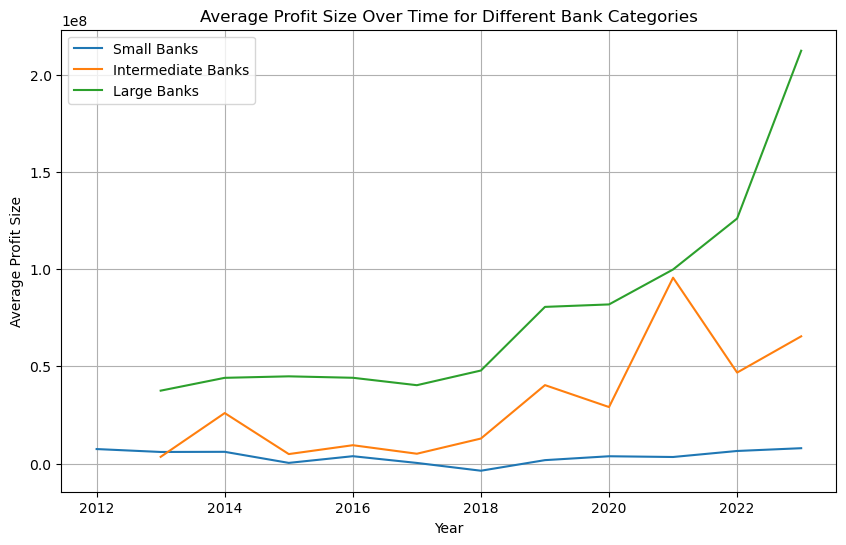

<Figure size 640x480 with 0 Axes>

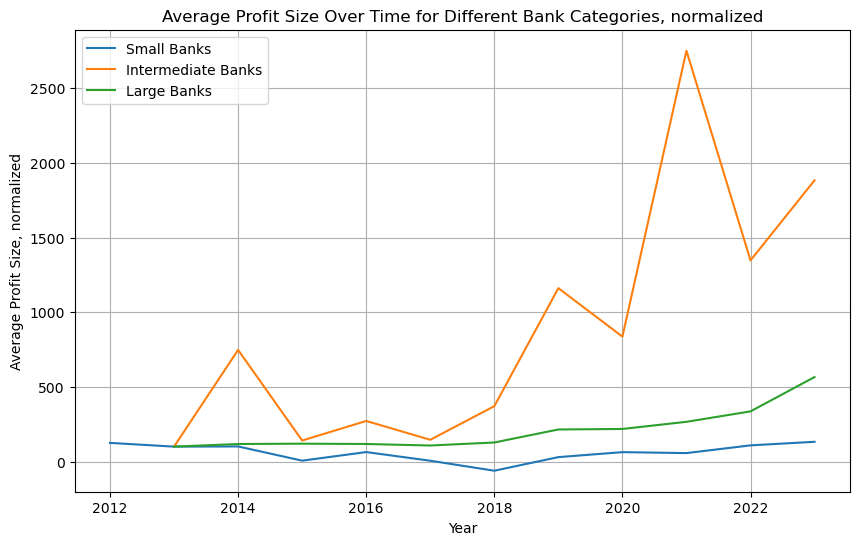

In [17]:
#Let's gather a similar list for revenue
banks_plotter('Profit')

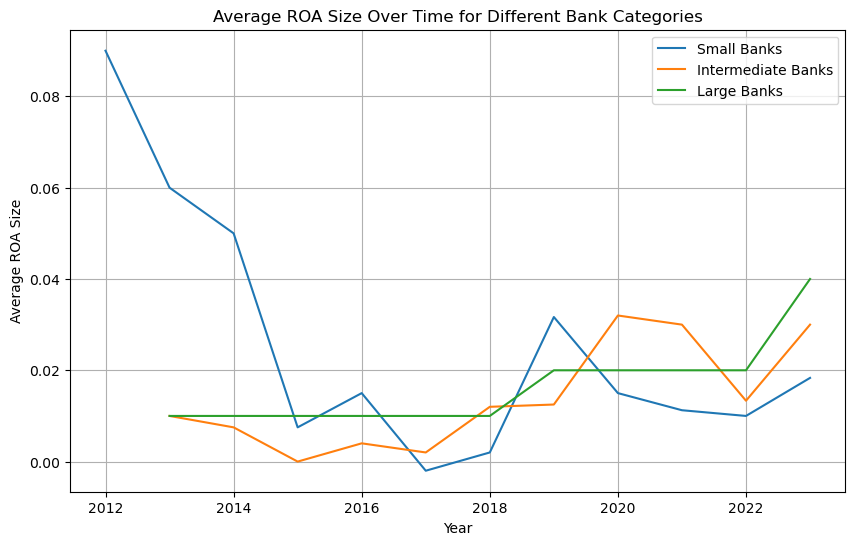

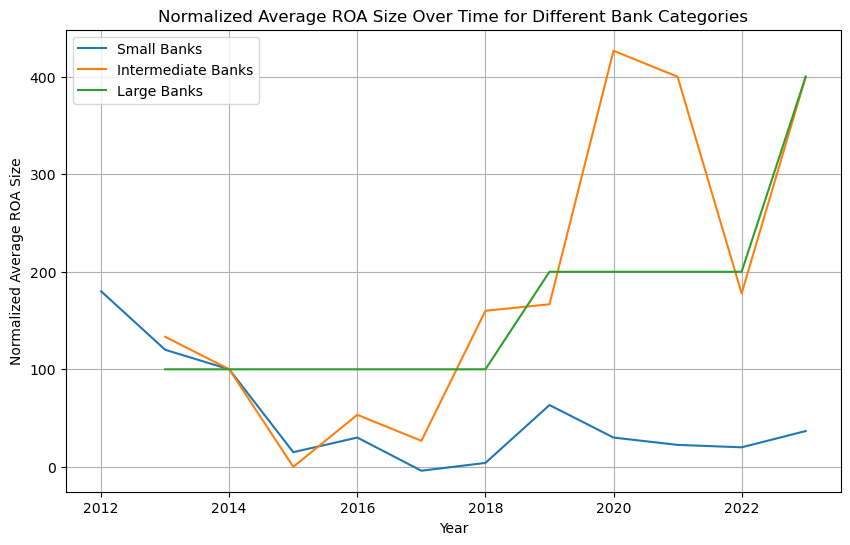

In [29]:
banks_plotter_ratio('ROA', start_year = 2014)

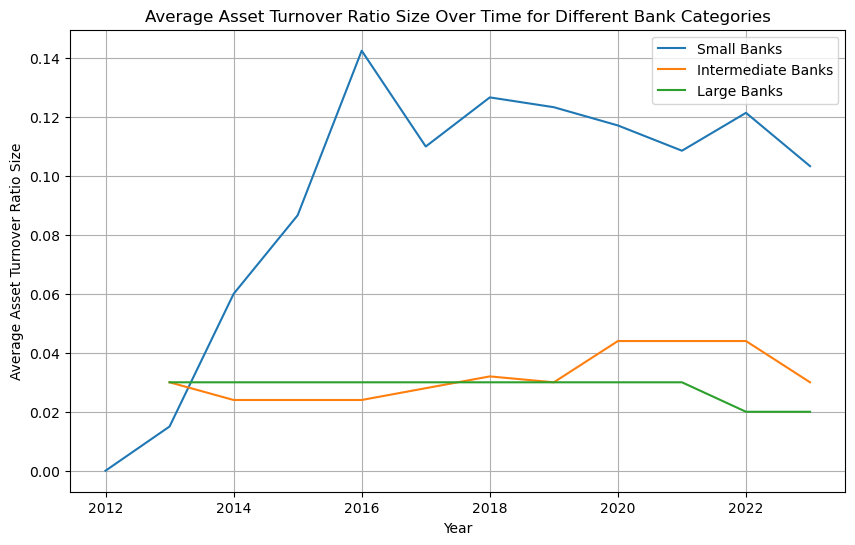

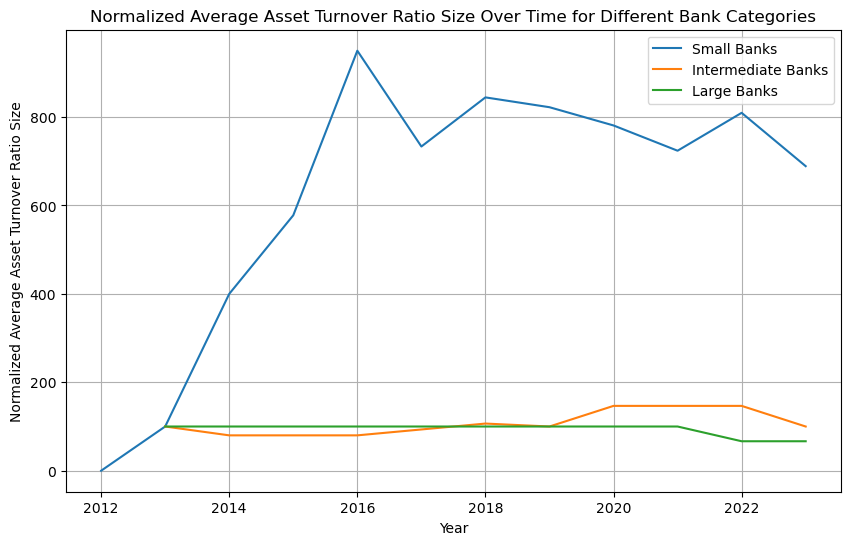

In [28]:
banks_plotter_ratio('Asset Turnover Ratio')